# Сегментация клиентской базы телекоммуникационной компании

**Аналитическая задача** — провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

## Описание данных
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`.

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Добавление новых переменных:
- по значениям признака `Возраст` введите новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} =
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\  
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$

- по значениям признака `Дата подключения тарифа` создайте признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`;  

**Шаг 3.** Провести исследовательский анализ данных:
- в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуйте:
    - динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год и месяц подключались меньше/больше всего клиентов? Какие выводы можно сделать?
- в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);
- клиенты каких возрастных категорий (ТОП-2):
  
    - больше всего в среднем в месяц тратят на оплату услуг связи;
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;
Какие выводы можно сделать?

Библиотеки

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
#from google.colab import drive
#drive.mount('/content/drive')

## 1. Импорт данных

In [89]:
df = pd.read_csv('dataset_telecom+(3).csv')

In [90]:
df.shape

(4492, 11)

In [91]:
df.head()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53


## 2. Первичная обработка данных

Типы данных

In [92]:
df.dtypes

Возраст                                    int64
Среднемесячный расход                    float64
Средняя продолжительность разговоров     float64
Звонков днем за месяц                    float64
Звонков вечером за месяц                 float64
Звонков ночью за месяц                    object
Звонки в другие города                    object
Звонки в другие страны                     int64
Доля звонков на стационарные телефоны     object
Количество SMS за месяц                   object
Дата подключения тарифа                   object
dtype: object

In [93]:
# Приведем признак 'Дата подключения тарифа' к типу datetime
df['Дата подключения тарифа'] = pd.to_datetime(df['Дата подключения тарифа'], errors='coerce')

In [94]:
# Приведем остальные признаки к типам int или float
for column in df.columns:
    if column != 'Дата подключения тарифа':
        # Попробуем сначала привести к int
        df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')
        # Если не удалось, попробуем привести к float
        #df[column].fillna(0, inplace=True)  # Заменим NaN на 0 перед приведением к float
        df[column] = df[column].astype(float, errors='ignore')  # Приводим к float, если не int

In [95]:
df.dtypes

Возраст                                         float64
Среднемесячный расход                           float64
Средняя продолжительность разговоров            float64
Звонков днем за месяц                           float64
Звонков вечером за месяц                        float64
Звонков ночью за месяц                          float64
Звонки в другие города                          float64
Звонки в другие страны                          float64
Доля звонков на стационарные телефоны           float64
Количество SMS за месяц                         float64
Дата подключения тарифа                  datetime64[ns]
dtype: object

Дубликаты

In [96]:
df.duplicated().sum()

0

Аномалии

In [97]:
def calculate_iqr_boundaries(series):
  q25 = series.quantile(0.25)
  q75 = series.quantile(0.75)
  iqr = q75 - q25

  boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
  return boundaries

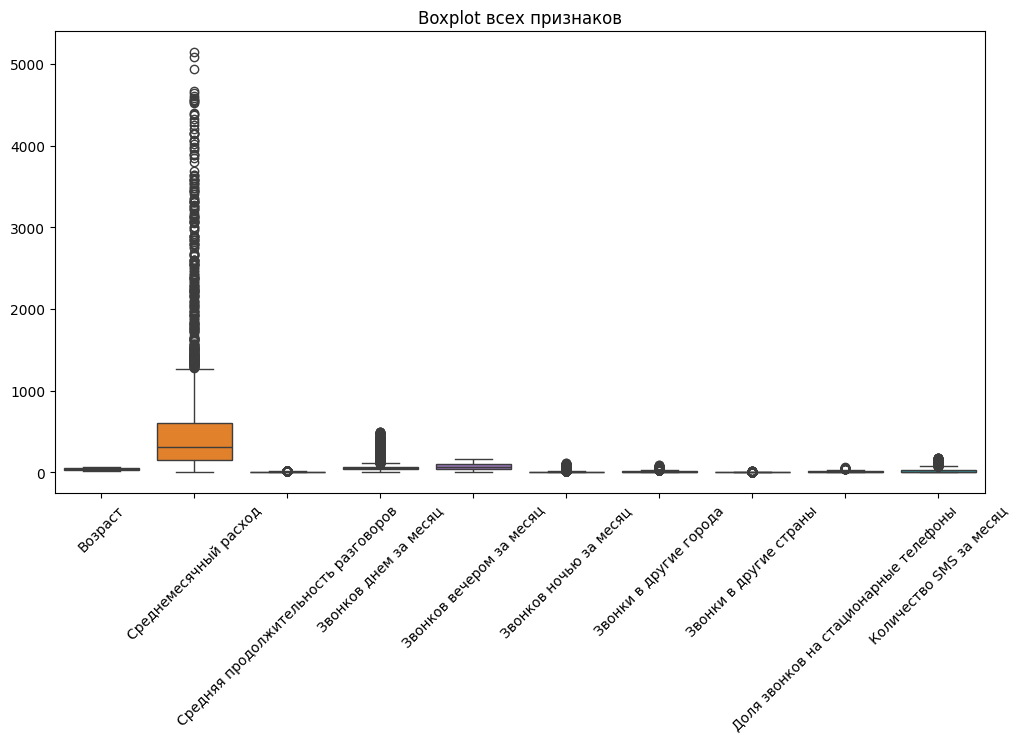

In [98]:
# посмотрим на данные
numeric_cols = df.columns #df.select_dtypes(include=['float64', 'int64']).columns

# Создаем boxplot для всех числовых признаков
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)  # Поворот меток по оси x для удобства чтения
plt.title('Boxplot всех признаков')
plt.show()

In [99]:
for i in df.columns:
    bounds = calculate_iqr_boundaries(df[i])
    out_l = sum(df[i] < bounds[0])
    out_r = sum(df[i] > bounds[1])
    print('-------', i, '-------')
    print('Размах', bounds)
    print('Количество выбросов', out_l, out_r)
    #plt.boxplot(df[i])
    #plt.show()
    print('=======+++++++=======')

------- Возраст -------
Размах (-0.5, 83.5)
Количество выбросов 0 0
=======+++++++=======
------- Среднемесячный расход -------
Размах (-518.5349999999999, 1270.8649999999998)
Количество выбросов 0 325
=======+++++++=======
------- Средняя продолжительность разговоров -------
Размах (-3.6, 11.600000000000001)
Количество выбросов 0 125
=======+++++++=======
------- Звонков днем за месяц -------
Размах (-9.5, 114.5)
Количество выбросов 0 272
=======+++++++=======
------- Звонков вечером за месяц -------
Размах (-42.0, 182.0)
Количество выбросов 0 0
=======+++++++=======
------- Звонков ночью за месяц -------
Размах (-7.5, 12.5)
Количество выбросов 0 521
=======+++++++=======
------- Звонки в другие города -------
Размах (-18.0, 30.0)
Количество выбросов 0 494
=======+++++++=======
------- Звонки в другие страны -------
Размах (0.0, 0.0)
Количество выбросов 0 823
=======+++++++=======
------- Доля звонков на стационарные телефоны -------
Размах (-16.5, 35.5)
Количество выбросов 0 49
=====

In [100]:
# Выбросы заменим на граничные квантильного размаха
to_quant = df.columns


num_cols_list = df[to_quant]
for i in num_cols_list:
    print('======', i, '=====')
    lower_bound, upper_bound = calculate_iqr_boundaries(df[i])

    out_l = df[df[i] < lower_bound]  # Строки с левыми выбросами
    out_r = df[df[i] > upper_bound]  # Строки с правыми выбросами

    # Заменяем выбросы на граничные значения
    df[i] = df[i].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    # После замены, пересчитываем границы
    lower_bound, upper_bound = calculate_iqr_boundaries(df[i])

    # Проверяем оставшиеся выбросы
    out_l = df[df[i] < lower_bound]  # Строки с левыми выбросами
    out_r = df[df[i] > upper_bound]  # Строки с правыми выбросами

    print('Размах', (lower_bound, upper_bound))
    print('Количество выбросов слева:', len(out_l))
    print('Количество выбросов справа:', len(out_r))
    print('Общее количество значений:', sum(df[i].value_counts()))

    if not out_l.empty:
        print('Выбросы слева:')
        print(out_l)

    if not out_r.empty:
        print('Выбросы справа:')
        print(out_r)

    print('=======+++++++=======')

====== Возраст =====
Размах (-0.5, 83.5)
Количество выбросов слева: 0
Количество выбросов справа: 0
Общее количество значений: 4492
=======+++++++=======
====== Среднемесячный расход =====
Размах (-518.5349999999999, 1270.8649999999998)
Количество выбросов слева: 0
Количество выбросов справа: 0
Общее количество значений: 4468
=======+++++++=======
====== Средняя продолжительность разговоров =====


Размах (-3.6, 11.600000000000001)
Количество выбросов слева: 0
Количество выбросов справа: 0
Общее количество значений: 4475
=======+++++++=======
====== Звонков днем за месяц =====
Размах (-9.5, 114.5)
Количество выбросов слева: 0
Количество выбросов справа: 0
Общее количество значений: 4472
=======+++++++=======
====== Звонков вечером за месяц =====
Размах (-42.0, 182.0)
Количество выбросов слева: 0
Количество выбросов справа: 0
Общее количество значений: 4489
=======+++++++=======
====== Звонков ночью за месяц =====
Размах (-7.5, 12.5)
Количество выбросов слева: 0
Количество выбросов справа: 0
Общее количество значений: 4491
=======+++++++=======
====== Звонки в другие города =====
Размах (-18.0, 30.0)
Количество выбросов слева: 0
Количество выбросов справа: 0
Общее количество значений: 4490
=======+++++++=======
====== Звонки в другие страны =====
Размах (0.0, 0.0)
Количество выбросов слева: 0
Количество выбросов справа: 0
Общее количество значений: 4492
=======+++++++=======
=====

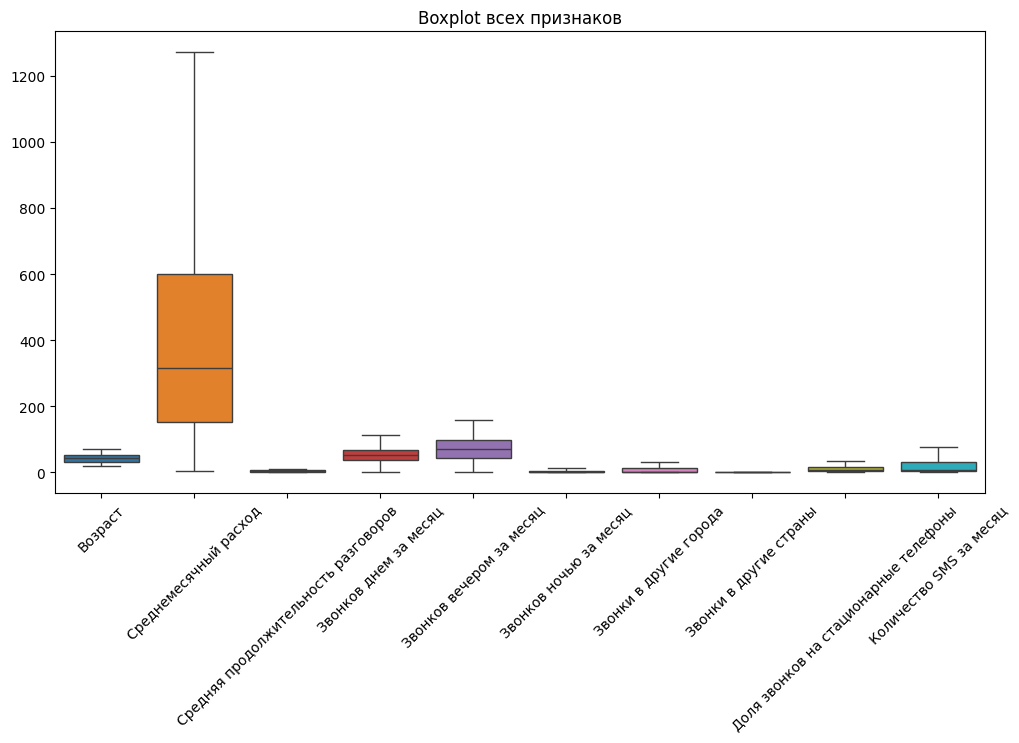

In [101]:
# Проверим результат
numeric_cols = df.columns #df.select_dtypes(include=['float64', 'int64']).columns

# Создаем boxplot для всех числовых признаков
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)  # Поворот меток по оси x для удобства чтения
plt.title('Boxplot всех признаков')
plt.show()

Пропуски

In [102]:
null_features = df.columns[df.isnull().any()].tolist()
print(null_features)
# посмотрим пропуски больше 3-х в строке
df_miss_row = df[df.isna().sum(axis=1) >= 3]
df_miss_row.shape

['Среднемесячный расход', 'Средняя продолжительность разговоров', 'Звонков днем за месяц', 'Звонков вечером за месяц', 'Звонков ночью за месяц', 'Звонки в другие города', 'Доля звонков на стационарные телефоны', 'Количество SMS за месяц']


(0, 11)

In [103]:

for feature in null_features:
    median = df[feature].median()
    df[feature] = df[feature].fillna(median)

null_features = df.columns[df.isnull().any()].tolist()
null_features

[]

## 3. Добавление новых признаков

In [105]:
# Функция для определения возрастной категории
def categorize_age(age):
    if age in range(19, 25):
        return 'студент'
    elif age in range(25, 34):
        return 'аспирант'
    elif age in range(34, 57):
        return 'бизнесмен'
    elif age in range(57, 71):
        return 'знаток'
    else:
        return 'другое'



In [106]:
# Применяем функцию к каждому значению в столбце 'Возраст'
df['Возрастная категория'] = df['Возраст'].apply(categorize_age)

# Выводим результат
df['Возрастная категория'].value_counts()

Возрастная категория
бизнесмен    2483
аспирант      831
знаток        661
студент       517
Name: count, dtype: int64

In [107]:
df['Год подключения'] = pd.to_datetime(df['Дата подключения тарифа']).dt.year
df['Месяц подключения'] = pd.to_datetime(df['Дата подключения тарифа']).dt.month
df['День подключения'] = pd.to_datetime(df['Дата подключения тарифа']).dt.day

df.head()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Возрастная категория,Год подключения,Месяц подключения,День подключения
0,24.0,315.51,2.4,12.0,65.0,5.0,0.0,0.0,5.0,56.0,2018-06-17 12:14:35,студент,2018,6,17
1,51.0,287.51,1.7,111.0,109.0,1.0,30.0,0.0,6.0,1.0,2021-10-21 15:39:54,бизнесмен,2021,10,21
2,41.0,113.70,2.1,41.0,27.0,0.0,0.0,0.0,1.0,36.0,2015-03-26 11:26:15,бизнесмен,2015,3,26
3,35.0,410.23,5.6,47.0,49.0,0.0,0.0,0.0,11.0,23.0,2016-01-04 15:53:20,бизнесмен,2016,1,4
4,26.0,537.60,4.8,58.0,77.0,4.0,0.0,0.0,16.0,29.0,2017-05-03 13:33:53,аспирант,2017,5,3


In [108]:

# Проверка на возможное появление пропусков
null_features = df.columns[df.isnull().any()].tolist()
print(null_features)

[]


## 4. Исследовательский анализ данных

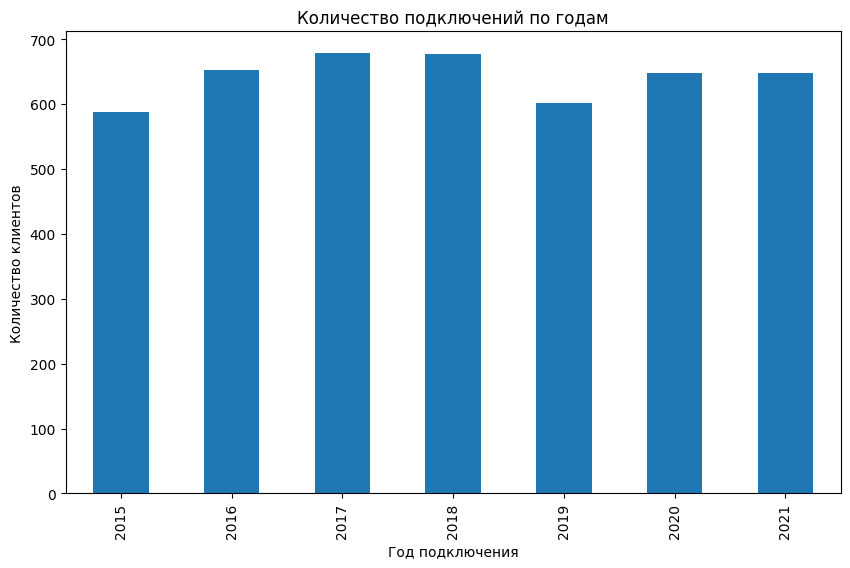

In [109]:
# Группируем данные по году подключения
yearly_connections = df.groupby('Год подключения').size()

# График по годам
plt.figure(figsize=(10, 6))
yearly_connections.plot(kind='bar')
plt.title('Количество подключений по годам')
plt.xlabel('Год подключения')
plt.ylabel('Количество клиентов')
plt.show()

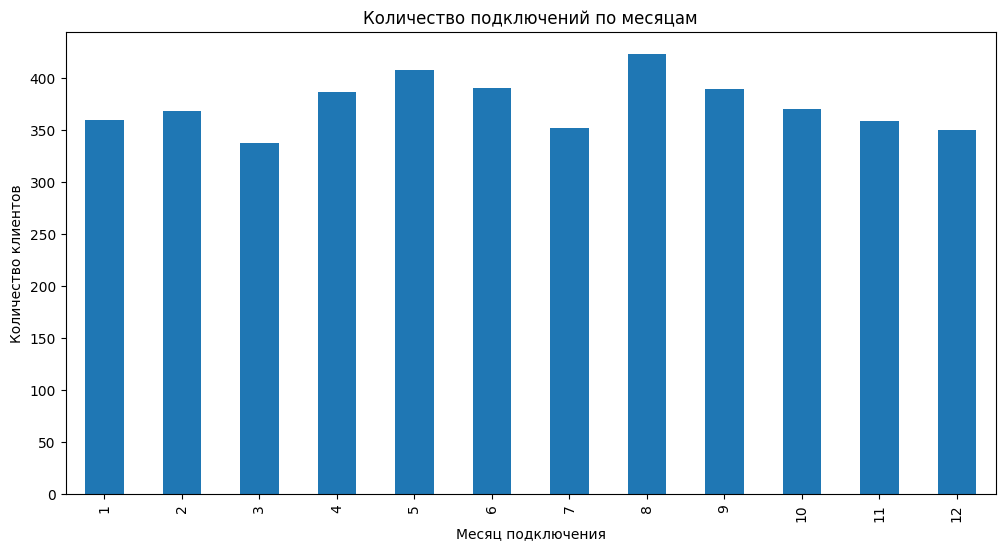

In [110]:
# Группируем данные по месяцу подключения
monthly_connections = df.groupby('Месяц подключения').size()

# График по месяцам
plt.figure(figsize=(12, 6))
monthly_connections.plot(kind='bar')
plt.title('Количество подключений по месяцам')
plt.xlabel('Месяц подключения')
plt.ylabel('Количество клиентов')
plt.show()

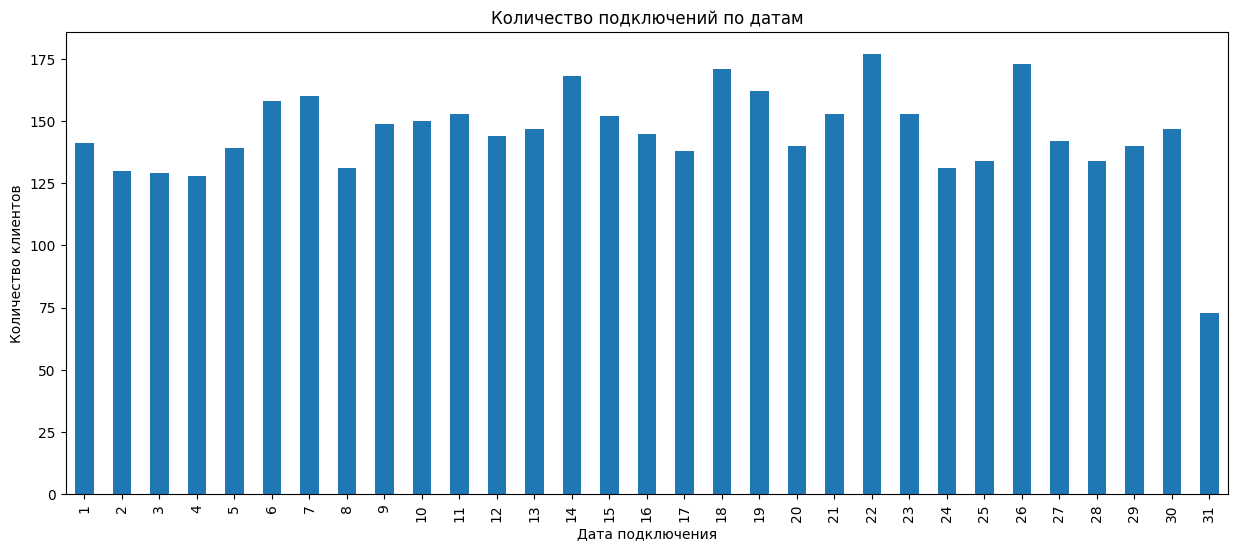

In [111]:
# Группируем данные по дате подключения
daily_connections = df.groupby('День подключения').size()

# График по датам
plt.figure(figsize=(15, 6))
daily_connections.plot(kind='bar')
plt.title('Количество подключений по датам')
plt.xlabel('Дата подключения')
plt.ylabel('Количество клиентов')
plt.show()

In [112]:
df['Месяц подключения'].value_counts()

Месяц подключения
8     423
5     408
6     390
9     389
4     386
10    370
2     368
1     360
11    359
7     352
12    350
3     337
Name: count, dtype: int64

В какой год и месяц подключались меньше/больше всего клиентов?

Август - максимум

Март - минимум

Какие выводы можно сделать?

Анализ признака: Среднемесячный расход
Возрастная категория: студент
Среднее: 212.48465183752418, Медиана: 138.32, Мода: 1270.8649999999998
----------------------------------------
Возрастная категория: бизнесмен
Среднее: 434.45601288763584, Медиана: 337.04, Мода: 1270.8649999999998
----------------------------------------
Возрастная категория: аспирант
Среднее: 589.1271961492178, Медиана: 462.24, Мода: 1270.8649999999998
----------------------------------------
Возрастная категория: знаток
Среднее: 349.41738275340384, Медиана: 226.8, Мода: 1270.8649999999998
----------------------------------------


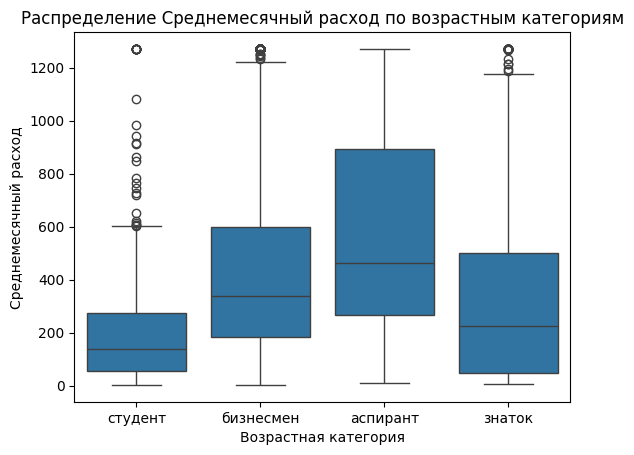

Анализ признака: Средняя продолжительность разговоров
Возрастная категория: студент
Среднее: 2.827079303675048, Медиана: 2.4, Мода: 3.0
----------------------------------------
Возрастная категория: бизнесмен
Среднее: 4.200986709625453, Медиана: 3.4, Мода: 1.7
----------------------------------------
Возрастная категория: аспирант
Среднее: 5.21095066185319, Медиана: 4.4, Мода: 11.600000000000001
----------------------------------------
Возрастная категория: знаток
Среднее: 3.686384266263237, Медиана: 2.8, Мода: 2.5
----------------------------------------


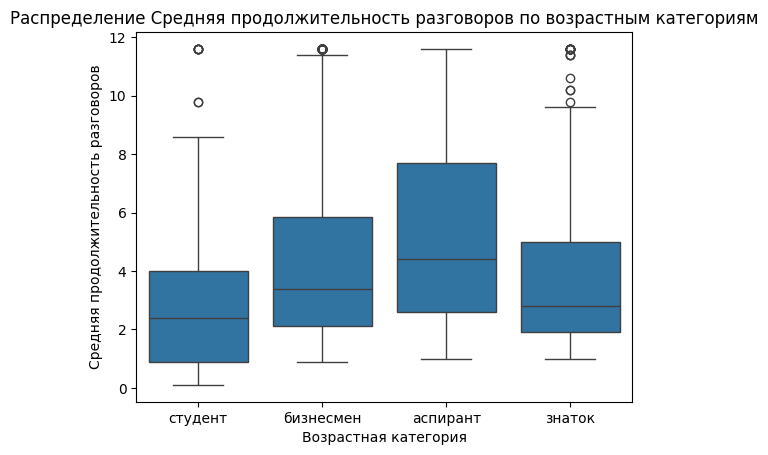

Анализ признака: Звонков днем за месяц
Возрастная категория: студент
Среднее: 35.939071566731144, Медиана: 35.0, Мода: 32.0
----------------------------------------
Возрастная категория: бизнесмен
Среднее: 56.61457913813935, Медиана: 55.0, Мода: 114.5
----------------------------------------
Возрастная категория: аспирант
Среднее: 69.96510228640193, Медиана: 63.0, Мода: 114.5
----------------------------------------
Возрастная категория: знаток
Среднее: 44.536308623298034, Медиана: 44.0, Мода: 114.5
----------------------------------------


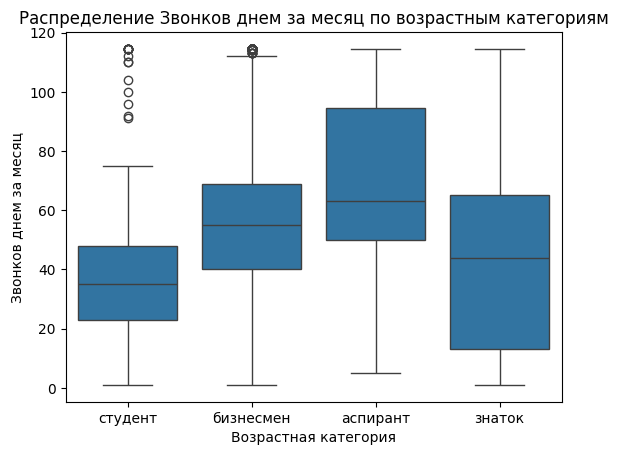

Анализ признака: Звонков вечером за месяц
Возрастная категория: студент
Среднее: 68.84526112185686, Медиана: 70.0, Мода: 61.0
----------------------------------------
Возрастная категория: бизнесмен
Среднее: 69.90253725332259, Медиана: 70.0, Мода: 4.0
----------------------------------------
Возрастная категория: аспирант
Среднее: 85.51022864019254, Медиана: 85.0, Мода: 76.0
----------------------------------------
Возрастная категория: знаток
Среднее: 54.24508320726172, Медиана: 51.0, Мода: 3.0
----------------------------------------


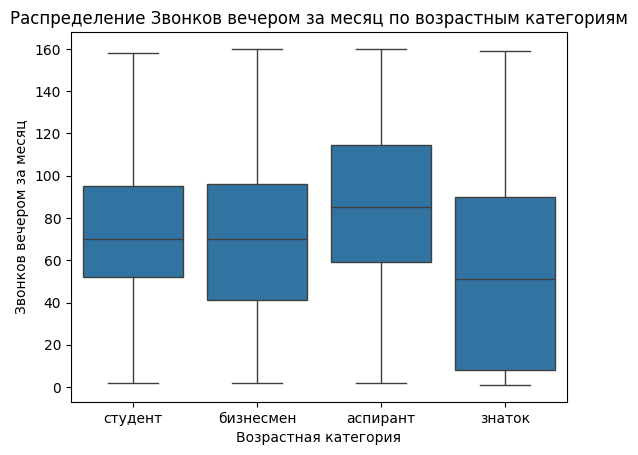

Анализ признака: Звонков ночью за месяц
Возрастная категория: студент
Среднее: 6.738878143133462, Медиана: 7.0, Мода: 12.5
----------------------------------------
Возрастная категория: бизнесмен
Среднее: 2.2325815545710834, Медиана: 0.0, Мода: 0.0
----------------------------------------
Возрастная категория: аспирант
Среднее: 4.676895306859206, Медиана: 3.0, Мода: 0.0
----------------------------------------
Возрастная категория: знаток
Среднее: 1.5907715582450832, Медиана: 0.0, Мода: 0.0
----------------------------------------


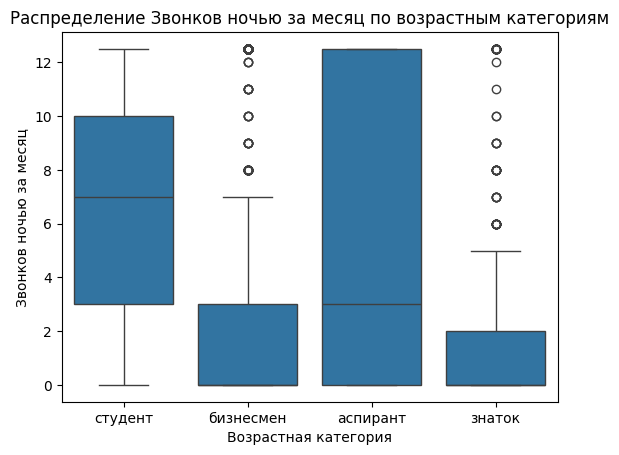

Анализ признака: Звонки в другие города
Возрастная категория: студент
Среднее: 0.9922630560928434, Медиана: 0.0, Мода: 0.0
----------------------------------------
Возрастная категория: бизнесмен
Среднее: 8.72613773660894, Медиана: 3.0, Мода: 0.0
----------------------------------------
Возрастная категория: аспирант
Среднее: 9.884476534296029, Медиана: 5.0, Мода: 0.0
----------------------------------------
Возрастная категория: знаток
Среднее: 6.006051437216339, Медиана: 0.0, Мода: 0.0
----------------------------------------


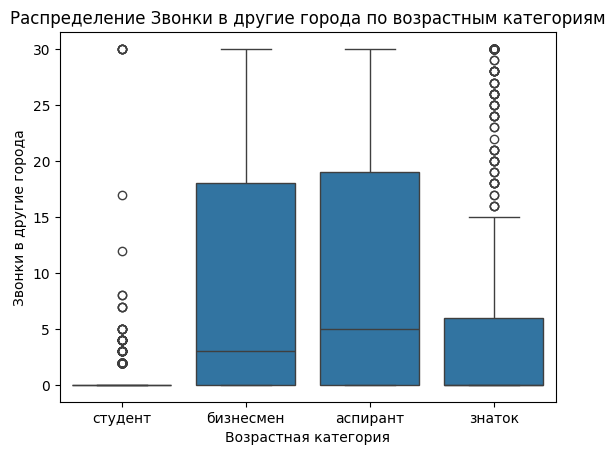

Анализ признака: Доля звонков на стационарные телефоны
Возрастная категория: студент
Среднее: 3.95357833655706, Медиана: 3.0, Мода: 0.0
----------------------------------------
Возрастная категория: бизнесмен
Среднее: 11.122029802658075, Медиана: 10.0, Мода: 0.0
----------------------------------------
Возрастная категория: аспирант
Среднее: 11.158243080625752, Медиана: 10.0, Мода: 0.0
----------------------------------------
Возрастная категория: знаток
Среднее: 10.35854765506808, Медиана: 8.0, Мода: 4.0
----------------------------------------


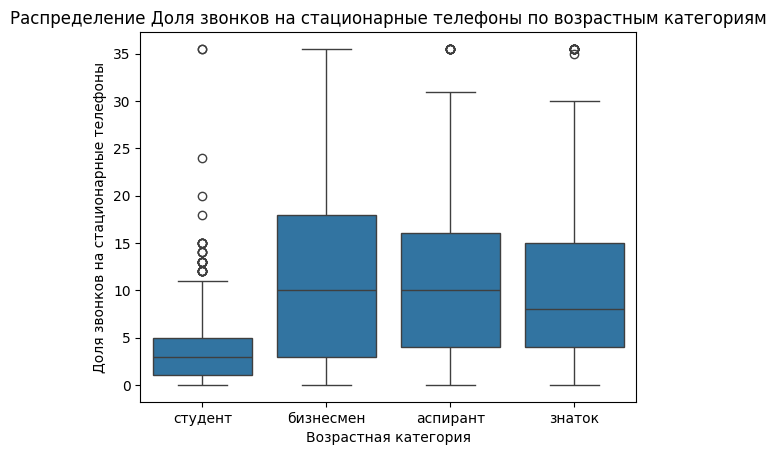

Анализ признака: Количество SMS за месяц
Возрастная категория: студент
Среднее: 44.5531914893617, Медиана: 41.0, Мода: 75.5
----------------------------------------
Возрастная категория: бизнесмен
Среднее: 13.981675392670157, Медиана: 5.0, Мода: 0.0
----------------------------------------
Возрастная категория: аспирант
Среднее: 34.41275571600482, Медиана: 29.0, Мода: 75.5
----------------------------------------
Возрастная категория: знаток
Среднее: 2.729198184568835, Медиана: 3.0, Мода: 3.0
----------------------------------------


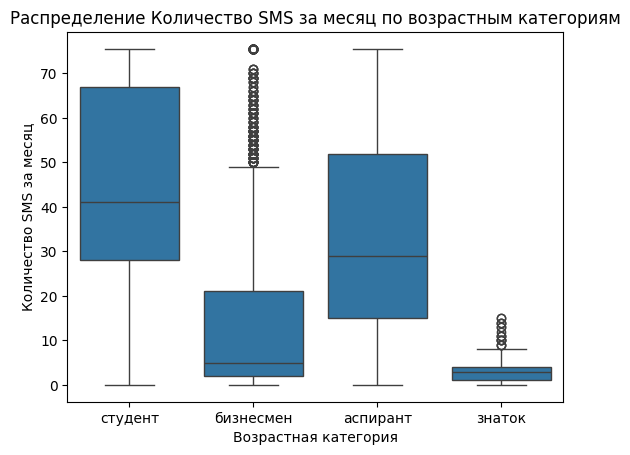

In [113]:
# Список признаков для анализа
features = [
    'Среднемесячный расход', 'Средняя продолжительность разговоров', 'Звонков днем за месяц', 'Звонков вечером за месяц', 'Звонков ночью за месяц', 'Звонки в другие города',
    'Доля звонков на стационарные телефоны', 'Количество SMS за месяц'
]

# Рассчитываем выборочное среднее, медиану и моду для каждого признака
age_categories = df['Возрастная категория'].unique()

for feature in features:
    print(f"Анализ признака: {feature}")

    for category in age_categories:
        category_data = df[df['Возрастная категория'] == category][feature]
        mean_value = category_data.mean()
        median_value = category_data.median()
        mode_value = category_data.mode().iloc[0] if not category_data.mode().empty else None
        print(f"Возрастная категория: {category}")
        print(f"Среднее: {mean_value}, Медиана: {median_value}, Мода: {mode_value}")
        print("-" * 40)

    # Построение графика распределения plt.figure(figsize=(12, 6))
    sns.boxplot(x='Возрастная категория', y=feature, data=df)
    plt.title(f'Распределение {feature} по возрастным категориям')
    plt.show()

Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток)


In [130]:
for feature in features:
    print(f"Анализ признака: {feature}")
    print('+'*40)

    for category in age_categories:
        category_data = df[df['Возрастная категория'] == category][feature]
        mean_value = category_data.mean()
        median_value = category_data.median()
        mode_value = category_data.mode().iloc[0] if not category_data.mode().empty else None
        print(f"Возрастная категория: {category}")
        print(f"Среднее: {mean_value}, Медиана: {median_value}, Мода: {mode_value}")
        print("-" * 40)

Анализ признака: Среднемесячный расход
++++++++++++++++++++++++++++++++++++++++
Возрастная категория: студент
Среднее: 212.48465183752418, Медиана: 138.32, Мода: 1270.8649999999998
----------------------------------------
Возрастная категория: бизнесмен
Среднее: 434.45601288763584, Медиана: 337.04, Мода: 1270.8649999999998
----------------------------------------
Возрастная категория: аспирант
Среднее: 589.1271961492178, Медиана: 462.24, Мода: 1270.8649999999998
----------------------------------------
Возрастная категория: знаток
Среднее: 349.41738275340384, Медиана: 226.8, Мода: 1270.8649999999998
----------------------------------------
Анализ признака: Средняя продолжительность разговоров
++++++++++++++++++++++++++++++++++++++++
Возрастная категория: студент
Среднее: 2.827079303675048, Медиана: 2.4, Мода: 3.0
----------------------------------------
Возрастная категория: бизнесмен
Среднее: 4.200986709625453, Медиана: 3.4, Мода: 1.7
----------------------------------------
Возрастна

In [131]:
# Функция для нахождения ТОП-2 категорий с учетом сортировки
def get_top_categories(df, feature, n=2):
    # Группировка по возрастной категории и рассчет среднего значения
    category_means = df.groupby('Возрастная категория')[feature].mean()
    # Сортировка и выбор топ-n
    sorted_categories = category_means.sort_values(ascending=False)
    return sorted_categories.head(2).index.tolist()



In [132]:
# 1. Больше всего в среднем в месяц тратят на оплату услуг связи
top_spenders = get_top_categories(df, 'Среднемесячный расход')
print("ТОП-2 возрастные категории по среднему расходу:", top_spenders)

# 2. Больше всего тратят времени на общение днем, вечером и ночью
top_day_calls = get_top_categories(df, 'Звонков днем за месяц')
top_evening_calls = get_top_categories(df, 'Звонков вечером за месяц')
top_night_calls = get_top_categories(df, 'Звонков ночью за месяц')

print("ТОП-2 возрастные категории по звонкам днем:", top_day_calls)
print("ТОП-2 возрастные категории по звонкам вечером:", top_evening_calls)
print("ТОП-2 возрастные категории по звонкам ночью:", top_night_calls)

# 3. Больше всего по количеству звонков в месяц днем, вечером и ночью
top_day_duration = get_top_categories(df, 'Средняя продолжительность разговоров')
print("ТОП-2 возрастные категории по продолжительности разговоров:", top_day_duration)


ТОП-2 возрастные категории по среднему расходу: ['аспирант', 'бизнесмен']
ТОП-2 возрастные категории по звонкам днем: ['аспирант', 'бизнесмен']
ТОП-2 возрастные категории по звонкам вечером: ['аспирант', 'бизнесмен']
ТОП-2 возрастные категории по звонкам ночью: ['студент', 'аспирант']
ТОП-2 возрастные категории по продолжительности разговоров: ['аспирант', 'бизнесмен']
